<a href="https://colab.research.google.com/github/satya0212/Machine-Learning-Projects/blob/main/Medical_Insurance_Cost_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error



In [2]:
data=pd.read_csv('/content/insurance.csv')


In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [6]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [8]:
new_data=data.replace({'sex':{'male':0,'female':1},'smoker':{'yes':1,'no':0},'region':{'southwest':0,'southeast':1,'northwest':2,'northeast':3}})

/tmp/ipython-input-2700395090.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_data=data.replace({'sex':{'male':0,'female':1},'smoker':{'yes':1,'no':0},'region':{'southwest':0,'southeast':1,'northwest':2,'northeast':3}})


In [9]:
new_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


# Data visualisation

/tmp/ipython-input-1256077932.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data['age'], kde=True)


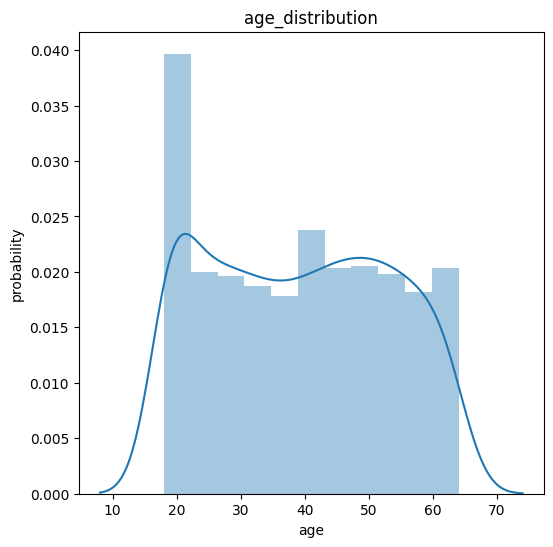

In [16]:
plt.figure(figsize=(6,6))
sns.distplot(new_data['age'], kde=True)
plt.title('age_distribution')
plt.xlabel('age')
plt.ylabel('probability')
plt.show()

/tmp/ipython-input-1669823748.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data['bmi'])


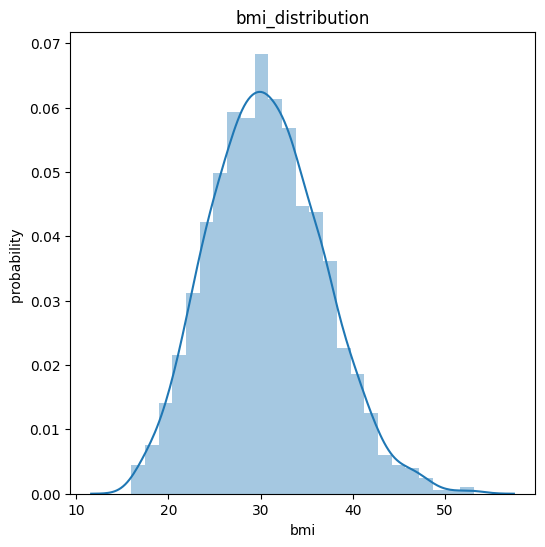

In [17]:
plt.figure(figsize=(6,6))
sns.distplot(new_data['bmi'])
plt.title('bmi_distribution')
plt.xlabel('bmi')
plt.ylabel('probability ')
plt.show()

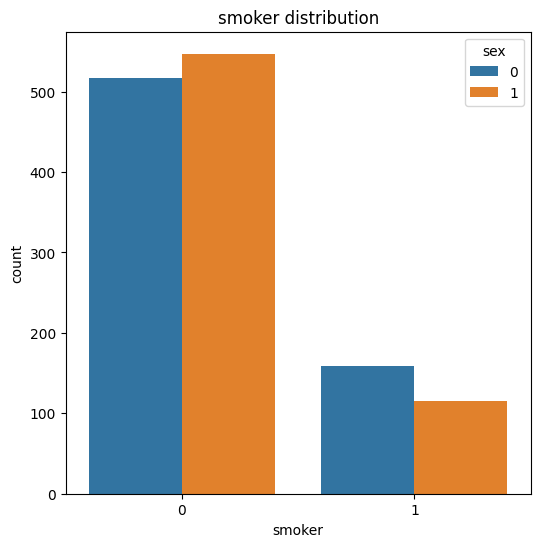

In [18]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=new_data,hue='sex')
plt.title('smoker distribution')
plt.xlabel('smoker')
plt.ylabel('count')
plt.show()

<Figure size 600x600 with 0 Axes>

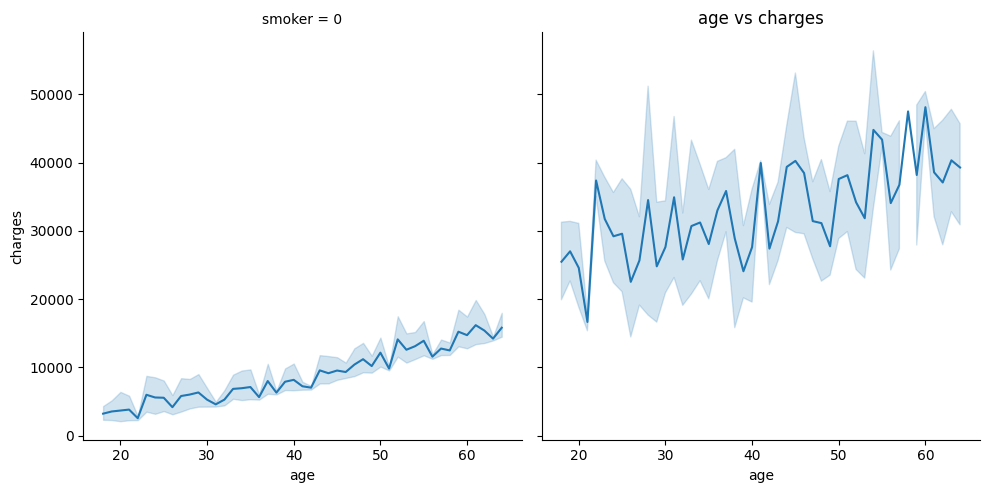

In [19]:
plt.figure(figsize=(6,6))
sns.relplot(x='age',y='charges',data=new_data,col='smoker',kind='line')
plt.title('age vs charges')
plt.xlabel('age')
plt.ylabel('charges')
plt.show()

<Figure size 600x600 with 0 Axes>

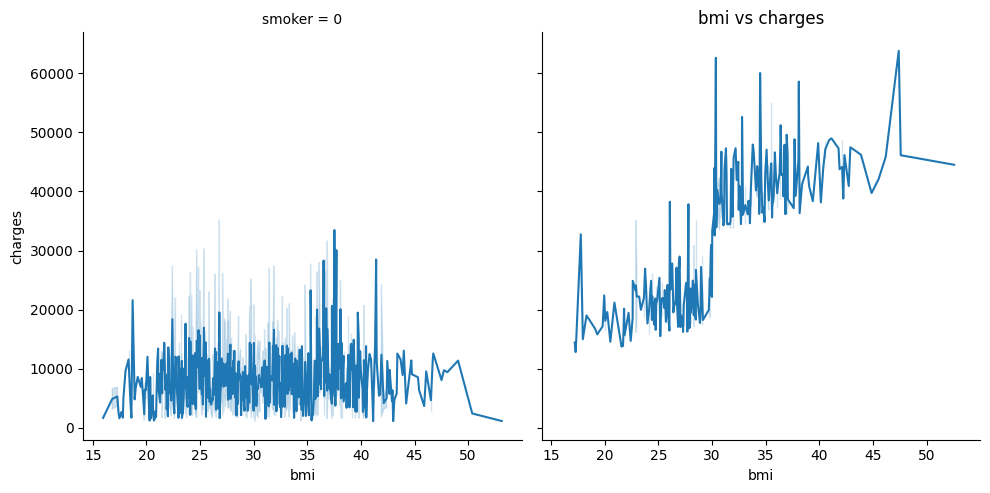

In [20]:
plt.figure(figsize=(6,6))
sns.relplot(x='bmi',y='charges',data=new_data,col='smoker',kind='line')
plt.title('bmi vs charges')
plt.xlabel('bmi')
plt.ylabel('charges')
plt.show()

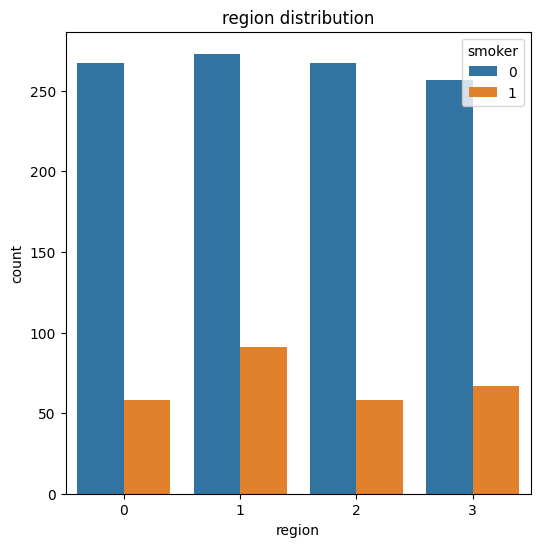

In [21]:
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=new_data,hue='smoker')
plt.title('region distribution')
plt.xlabel('region')
plt.ylabel('count')
plt.show()

<Axes: xlabel='region', ylabel='charges'>

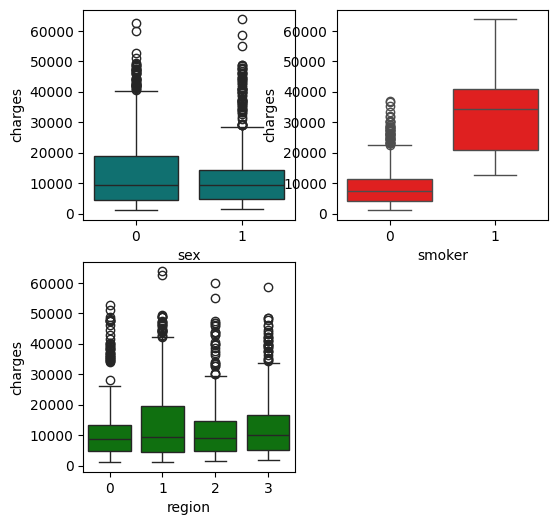

In [22]:
plt.figure(figsize=(6,6))
plt.subplot(2,2,1)
sns.boxplot(x='sex',y='charges',data=new_data,color='teal')
plt.subplot(2,2,2)
sns.boxplot(x='smoker',y='charges',data=new_data,color='red')
plt.subplot(2,2,3)
sns.boxplot(x='region',y='charges',data=new_data,color='green')

In [23]:
correlation=new_data.corr()

In [25]:
correlation

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.020856,0.109272,0.042469,-0.025019,-0.002127,0.299008
sex,0.020856,1.000000,-0.046371,-0.017163,-0.076185,0.004588,-0.057292
bmi,0.109272,-0.046371,1.000000,0.012759,0.003750,-0.157566,0.198341
children,0.042469,-0.017163,0.012759,1.000000,0.007673,-0.016569,0.067998
smoker,-0.025019,-0.076185,0.003750,0.007673,1.000000,0.002181,0.787251
region,-0.002127,0.004588,-0.157566,-0.016569,0.002181,1.000000,0.006208
charges,0.299008,-0.057292,0.198341,0.067998,0.787251,0.006208,1.000000


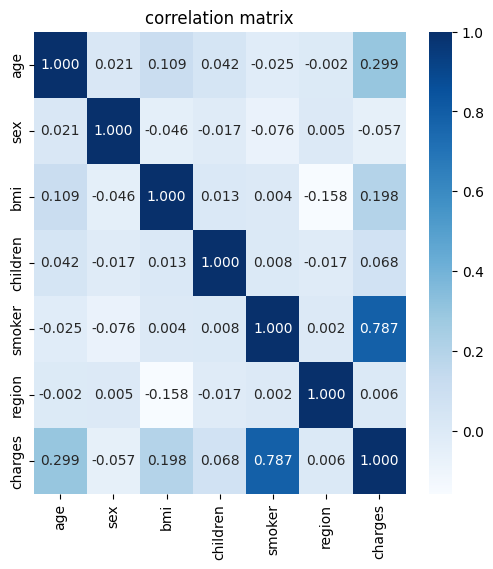

In [27]:
plt.figure(figsize=(6,6))
sns.heatmap(correlation,annot=True,fmt='.3f',cmap='Blues',cbar=True)
plt.title('correlation matrix')
plt.show()

# Predictive model

In [28]:
x=new_data.drop(['charges'],axis=1)
y=new_data['charges']

In [29]:
x

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,0
1,18,0,33.770,1,0,1
2,28,0,33.000,3,0,1
3,33,0,22.705,0,0,2
4,32,0,28.880,0,0,2
...,...,...,...,...,...,...
1333,50,0,30.970,3,0,2
1334,18,1,31.920,0,0,3
1335,18,1,36.850,0,0,1
1336,21,1,25.800,0,0,0


In [30]:
y

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [31]:
#splitting the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [34]:
print(x.shape,x_train.shape,x_test.shape)

(1338, 6) (1070, 6) (268, 6)


# model efficiencies

In [35]:
models={
    'linearregression':LinearRegression(),
    'svr':SVR(),
    'xboost':XGBRegressor(),
    'randomforest':RandomForestRegressor(),
    'adaboost':AdaBoostRegressor(),
    'gradientboost':GradientBoostingRegressor()
}

In [38]:
for model_name,model in models.items():
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  print('mse:',mean_squared_error(y_test,y_pred))
  print('r2:',r2_score(y_test,y_pred))
  print('mae:',mean_absolute_error(y_test,y_pred))

mse: 38364832.19054552
r2: 0.7445422986536503
mae: 4285.219437633699
mse: 162253642.2065993
r2: -0.08038899446523429
mae: 8467.296763302806
mse: 28771899.103785466
r2: 0.8084182104090256
mae: 3137.555542851786
mse: 24872182.349995974
r2: 0.8343850300441813
mae: 2744.9080587138437
mse: 28051304.946052555
r2: 0.8132163892782511
mae: 4260.276512387676
mse: 19721591.516092956
r2: 0.8686809729658004
mae: 2358.079295265183


# Gradient Boosting regressor is giving best result among all with r2_score of 0.8686

In [183]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

# model evaluation

In [184]:
input_data=[37,0,29.83,2,0,3]
input_data_as_numpy_array=np.asarray(input_data)
inpuut_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=rf.predict(inpuut_data_reshaped)
print('estimated insurance charge:',prediction)

estimated insurance charge: [6617.6317025]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
